작업형 1유형 (1)
- 주어진 데이터를 활용해서 결측값이 가장 많은 컬럼명을 확인 
- 결측값을 최빈값으로 대체
- 결측값 대체 전 컬럼 평균과 ,  대체 후 컬럼 평균의 차이를 구하시오 (소수점 3자리 까지 출력)

In [ ]:
import pandas as pd 

data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/airquality.csv')
print(data.info())# 결측값이 가장 많은 컬럼 : Ozone : 153-116 = 37개 

# 결측치 최대값 대체 
data_after = data.copy()
data_after['Ozone'] = data_after['Ozone'].fillna(data_after['Ozone'].mode()[0])
print(data_after.info()) # 결측치 대체가 완료됨 

result = data['Ozone'].mean() - data_after['Ozone'].mean()
print(round(result,3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None
4.626


1유형(2)
- 주어진 와인데이터의 alchol 컬럼의 데이터를 최대-최소 정규화 
- alchol 컬럼의 표준편차 구하시오 (자유도 0 , 연산결과는 반올림 후 3자리 까지)

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/wine_data.csv')
print(data.info())
scaler = MinMaxScaler()
data['alcohol']=scaler.fit_transform(data[['alcohol']])
#결과 출력
result = data['alcohol'].std(ddof=0)
print(round(result,3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

# 1유형(3)
- 주어진 심장병 데이터의 chol 컬럼의 이상치 개수를 구하시오 (이상치 범위는 +- 1.5* IQR 이상 이하)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
16


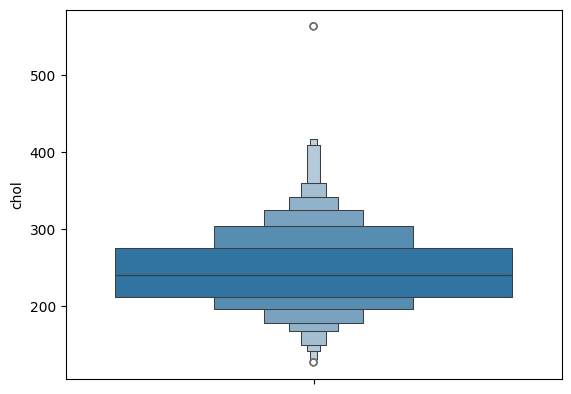

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/heart_disease_data.csv')

print(data.info())

Q1 = data['chol'].quantile(0.25)
Q3 = data['chol'].quantile(0.75)
IQR = Q3 - Q1

lower = data['chol'].values <= Q1 - IQR* 1.5
higher = data['chol'].values >= Q3 + IQR* 1.5

result = lower | higher
print(result.sum()) # 16 

#검증 
sns.boxenplot(data['chol'])
plt.show()

# 2유형 
-심장병 발생 데이터 예측 
[조건]
1. 80% 학습(820행) , 20% 테스트(1025 - 820 = 205 개) 
2. 학습용 데이터로 예측 모델링 , 테스트 데이터로 변수(target) 예측 후 결과 제출
3. 모델 평가지표: f1-score , roc_auc_score  // 분류 모델 
4. 예측 결과는 pred 컬럼을 갖고 예측결과 값은 0 , 1 로 나타냄 , index는 없음 
5. 얘측결과 파일명은 result.csv

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , f1_score

data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/heart_disease_data.csv')
#data.info() # target 제외 모두 연속형 변수들 , 추가적인 데이터 전처리 필요 x 바로 모델학습 시작
# 1. 80% 학습(820행) , 20% 테스트 
train = data[:820]
test = data[820:]

# 2. 학습용 데이터로 예측 모델링 0or 1 분류문제 >> 로지스틱 회귀 문제
X = train.drop(columns=['target']) # target은 종속형 변수 
y = train['target']
X_train , X_val , y_train , y_val = train_test_split(X,y,stratify=y, test_size=0.2)
rfc = LogisticRegression()
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_val)
# 모델 평가 
print('F1_score: ',f1_score(y_val, y_predict)) # 약 0.89 이상의 점수
print('roc_auc_score: ',roc_auc_score(y_val, y_predict))# 약 0.89 이상 점수  >> 잘 맞추는 모습 

# 최종 결과물 제작 
test_X_data = test.drop(columns=['target'])
pred = rfc.predict(test_X_data)
pd.DataFrame({'pred':pred}).to_csv('result.csv', index=False)
result = pd.read_csv('result.csv')
print(result)

F1_score:  0.8913043478260869
roc_auc_score:  0.8747580044676099
     pred
0       0
1       0
2       0
3       1
4       0
..    ...
200     1
201     0
202     0
203     1
204     0

[205 rows x 1 columns]


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3유형(1)
- 제공되는 데이터는 고혈압 환자의 치료전 후 혈압이다. 이러한 치료가 고혈압에 효과가 있는지 대응표본 T-검정을 수행하라 
- 귀무가설(H0) : u>=0
- 대립가설(H1) : u< 0
- u: (치료 후 혈압 - 치료 전 혈압) 평균

1. u의 표본평균을 구하시오 (소수점 2째자리)
2. 검정통계량의 값을 구하시오 (소수점 4째 자리 )
3. p-value 값을 구하시오 (소수점 4째자리)
4. 유의수준 5%에서 가설검정 결과를 구하시오(대립가설 채택 or 기각 )


In [ ]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/blood_pressure.csv')
# print(data.info()) 
# print(data['bp_before']) 심장질환 이전 / 이후 : bp_before /bp_after

from scipy.stats import ttest_rel # 대응표본 t검정 
data['diff']= data['bp_after']-data['bp_before']

# 1번 표본평균 
print(round(data['diff'].mean(),2))  # -5.09
# 2번 검정통계량의 값을 구하시오
t_stat , p_val = ttest_rel(data['bp_after'],data['bp_before'],alternative='less') 
    # a, b 는 순서상관 없음 , alternate='less' : 대립가설의 방향  u < 0
print(round(t_stat,4))
    # alternative: 대립가설의 방향 (기본값 'two-sided')
    # 'two-sided': a와 b의 평균이 다르다
    # 'less': a의 평균 < b의 평균
    # 'greater': a의 평균 > b의 평균
print(round(t_stat,4))
# 3 번 p_value
print(round(p_val,4))
# 4번 , p-value = 0.006 죽 유의수준 0.05을 넘지 않았기에 귀무가설을 기각, 대립가설을 채택 
print('대립가설 채택')

-5.09
-3.3372
0.0006
대립가설 채택


# 3유형(2)
- 타이타닉 생존자 정보 , 생존여부 예측 
- 'Name','Sex','Ticket','Cabin','Embarked' 는 제외 

1. 컬럼 Survived와 가장 큰 상관계수를 갖는 변수의 상관계수를 구해라 (단, 피어슨 상관계수)
2. 컬럼 Survived와 가장 큰 상관계수를 갖는 변수 2개를 활용,
   - 다중 선형 회귀모형으로 생존여부(Survivded)를 예측할 때 가장 작은 값을 갖는 회귀계수를 구하시오 
3. 문제 2의 모델에서 확인되는 가장 큰 값의 p_value를 구하시오 (단, 모든문제의 정답은 반올림하여 소수점 셋째 자리까지 출력)


In [ ]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
#print(data.info())
# 범주형 변수들 제거 (문제 조건)
drop_cols = ['Name','Sex','Ticket','Cabin','Embarked']
data = data.drop(columns=drop_cols)

#문제 1
corr = data.corr(method='pearson')# 피어슨 상관계수  ,,**주의** 상관계수는 +- 로 작다 크다가 아닌 절대값이 크면 가장 큰 상관계수  
display(corr)# 가장 큰 상관계수(=절대값)>> 1등:Pclass  2등: Fare
print(round(corr.Pclass.Survived,3))
# 문제2 
import statsmodels.api as sm
X = sm.add_constant(data[['Pclass','Fare']])# 좌측에 상수항을 결합 
model = sm.OLS(data['Survived'],X)
result = model.fit()
print(result.summary()) # Pclass 의 회귀계수가 음수로 가장 작음  , P-value = 0.007
print(round(result.params['Pclass'],3)) #정답

# 문제 3  p
print(0.007)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


-0.338
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Thu, 01 May 2025   Prob (F-statistic):           8.78e-26
Time:                        20:58:35   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7310      0.060     12.197  